<a href="https://colab.research.google.com/github/KndHvH/study/blob/2/FIAP/CyberSeguran%C3%A7a/s2/signedDocuments/ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
count = 0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1)
pd.set_option('display.max_colwidth', None)

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
orig = np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape

(30, 2600, 4624, 3)

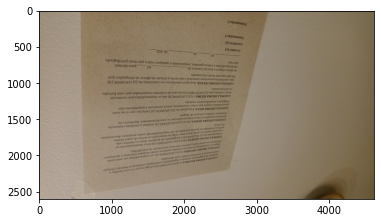

In [8]:
plt.imshow(orig[0])

In [9]:
# plt.figure(figsize=(9,9))
# i = 0
# for img in orig[0:16]:
#   plt.subplot(4, 4, i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i += 1
# plt.show()

In [10]:
contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in orig]

In [11]:
# plt.figure(figsize=(9,9))
# i=0
# for img in contrast[0:16]:
#   plt.subplot(4, 4, i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i += 1
# plt.show()

In [12]:
brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]

In [13]:
# plt.figure(figsize=(9,9))
# i=0
# for img in brightness[0:16]:
#   plt.subplot(4,4,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i+=1
# plt.show()

In [14]:
sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]

In [15]:
# plt.figure(figsize=(9,9))
# i=0
# for img in sharpness[0:16]:
#   plt.subplot(4,4,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i+=1
# plt.show()

In [16]:
color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]

In [17]:
# plt.figure(figsize=(9,9))
# i=0
# for img in color[0:16]:
#   plt.subplot(4,4,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i+=1
# plt.show()

In [18]:
flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]

In [19]:
# plt.figure(figsize=(9,9))
# i=0
# for img in flip[0:16]:
#   plt.subplot(4,4,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i+=1
# plt.show()

In [20]:
rotate = [Image.fromarray(img,'RGB').rotate(np.random.choice([0,90,180,270])) for img in flip]

In [21]:
# plt.figure(figsize=(9,9))
# i=0
# for img in rotate[0:16]:
#   plt.subplot(4,4,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(img)
#   i+=1
# plt.show()

In [10]:
def main():
  paths = glob.glob('/content/drive/MyDrive/imagedata/signed/*.jpg',recursive=True)
  len(paths)
  paths = random.sample(paths, 30)
  paths
  orig = np.array([np.asarray(Image.open(img)) for img in paths])
  orig.shape
  plt.imshow(orig[0])
  contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in orig]
  brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]
  sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]
  color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]
  flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]
  rotate = [Image.fromarray(img,'RGB').rotate(np.random.choice([0,90,180,270])) for img in flip]
  return rotate,paths

0it [00:00, ?it/s]

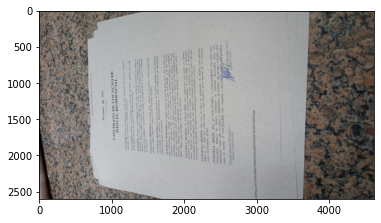

In [14]:
run = 1
while run > 0:
  rotate = main()
  import os
  for i, image in tqdm(enumerate(rotate[0])):
    aug = "AUG_" + str(count) +"_"
    count += 1
    
    directory = rotate[1][i].rsplit('/', 3)[0] + '/augmented/' + rotate[1][i].rsplit('/', 2)[1]+ '/'
    os.makedirs(directory, exist_ok = True)
    image.save(directory + aug + rotate[1][i].rsplit('/', 2)[2])
  run -= 1